In [1]:
## forecast of yearly sales by SubCategory

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

In [32]:
data= pd.read_csv("../turning_patterns_into_profits/Data/Transactions_all_data.csv")

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,...,Rate,Tax,total_amt,Store_type,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,...,-772,405.300,-4265.300,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,...,-1497,785.925,-8270.925,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,...,-1363,429.345,-4518.345,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.drop(["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis=1, inplace=True)

In [34]:
month_list=[]
year_list=[]
mo_yr_list=[]

for each_date in data['tran_date']:
    date= datetime.datetime.strptime(str(each_date), "%m/%d/%Y")
    month_list.append(date.month)
    year_list.append(date.year)
    mo_yr_list.append(f"{date.month}/{date.year}")

In [35]:
data["transaction_month"] = month_list
data["transaction_year"] = year_list
data["transaction_MoYr"] = mo_yr_list

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,transaction_month,transaction_year,transaction_MoYr
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,-5,-772,405.300,-4265.300,e-Shop,2,2014,2/2014
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,-5,-1497,785.925,-8270.925,e-Shop,2,2014,2/2014
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,-3,-1363,429.345,-4518.345,e-Shop,2,2014,2/2014
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014


In [36]:
##  create a df to use to plot category 1 sub-category1 total_amts by year.


data1= data.loc[(data["prod_cat_code"]==1) & (data['prod_subcat_code']==1)]
data1=data1.groupby(['transaction_year']).sum()
data1=data1.reset_index()
data1=data1.drop(3)
data1.head()

,transaction_year,transaction_id,cust_id,city_code,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,transaction_month
0,2011,13999952178214,74037665,1493,273,273,711,169453,76621.650,619602.230,2059
1,2012,16391499169069,87057383,1794,321,321,722,190736,77127.225,623932.725,2096
2,2013,17722639529647,96209691,2021,355,355,847,226518,85806.840,729744.210,2412


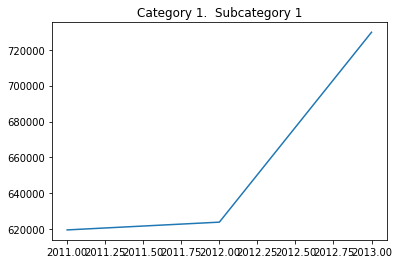

Model Score: 0.7794406675818482    2014 Sales Prediction: [[767901.70166667]]


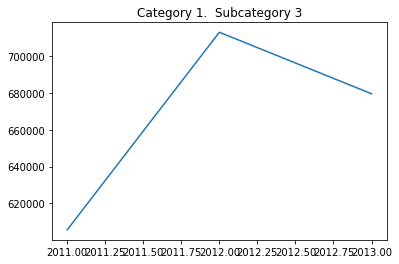

Model Score: 0.4528803077661722    2014 Sales Prediction: [[740268.23]]


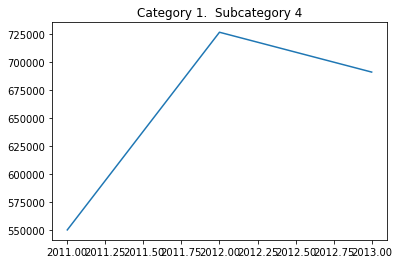

Model Score: 0.5698741659884136    2014 Sales Prediction: [[797324.905]]


In [38]:
##Category 1
subcat=[1,3,4]

for each in subcat:
    data1= data.loc[(data["prod_cat_code"]==1) & (data['prod_subcat_code']==each)]
    data1=data1.groupby(['transaction_year']).sum()
    data1=data1.reset_index()
    data1=data1.drop(3)
    
    X=data1['transaction_year'].values.reshape(-1,1)
    y=data1['total_amt'].values.reshape(-1,1)
    
    plt.plot(X,y)
    plt.title(f"Category 1.  Subcategory {each}")
    plt.show()
    
    model=LinearRegression()
    model.fit(X,y)
    Score=model.score(X,y)
    prediction= model.predict([[2014]])
    
    print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")


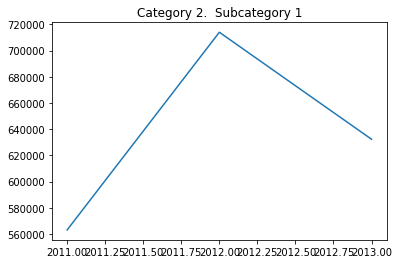

Model Score: 0.20994371556656757    2014 Sales Prediction: [[705663.31333333]]


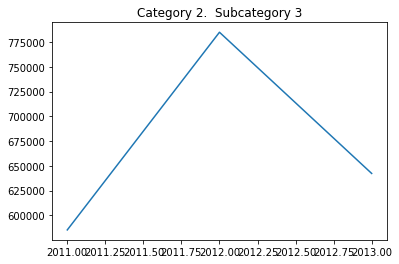

Model Score: 0.07692445326479602    2014 Sales Prediction: [[727839.19]]


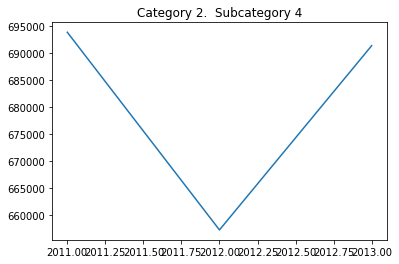

Model Score: 0.003708703789150558    2014 Sales Prediction: [[678351.765]]


In [39]:
##Category 2
subcat=[1,3,4]

for each in subcat:
    data1= data.loc[(data["prod_cat_code"]==2) & (data['prod_subcat_code']==each)]
    data1=data1.groupby(['transaction_year']).sum()
    data1=data1.reset_index()
    data1=data1.drop(3)
    
    X=data1['transaction_year'].values.reshape(-1,1)
    y=data1['total_amt'].values.reshape(-1,1)
    
    plt.plot(X,y)
    plt.title(f"Category 2.  Subcategory {each}")
    plt.show()
    
    model=LinearRegression()
    model.fit(X,y)
    Score=model.score(X,y)
    prediction= model.predict([[2014]])
    
    print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")


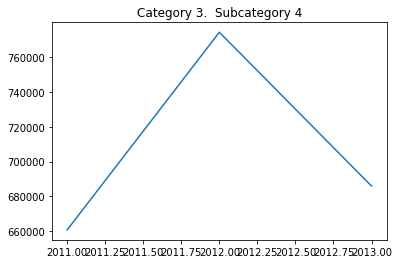

Model Score: 0.044602021394200886    2014 Sales Prediction: [[732195.1]]


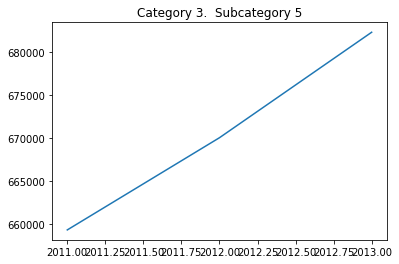

Model Score: 0.9984999105131029    2014 Sales Prediction: [[693550.67166666]]


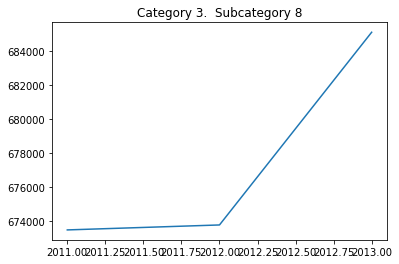

Model Score: 0.7688002188018475    2014 Sales Prediction: [[689071.73833333]]


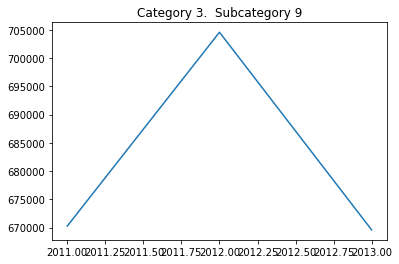

Model Score: 0.0002952225599580638    2014 Sales Prediction: [[680802.28666667]]


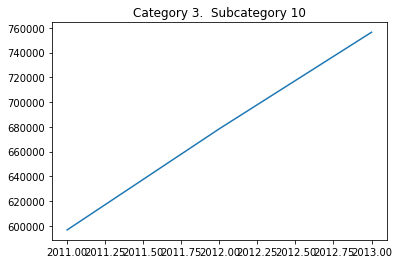

Model Score: 0.9998174168457911    2014 Sales Prediction: [[836823.13]]


In [47]:
##Category 3
subcat=[4,5,8,9,10]

for each in subcat:
    try:
        data1= data.loc[(data["prod_cat_code"]==3) & (data['prod_subcat_code']==each)]
        data1=data1.groupby(['transaction_year']).sum()
        data1=data1.reset_index()
        data1=data1.drop(3)
    
    
        X=data1['transaction_year'].values.reshape(-1,1)
        y=data1['total_amt'].values.reshape(-1,1)
    
        plt.plot(X,y)
        plt.title(f"Category 3.  Subcategory {each}")
        plt.show()
    
        model=LinearRegression()
        model.fit(X,y)
        Score=model.score(X,y)
        prediction= model.predict([[2014]])
    
        print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")
    
    except: 
        print("No Data in Category")


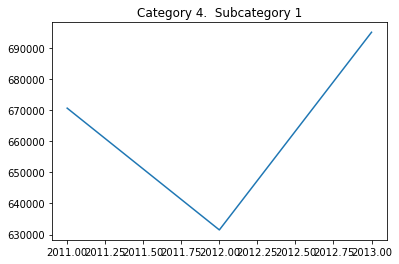

Model Score: 0.1448346305795427    2014 Sales Prediction: [[690098.28333334]]


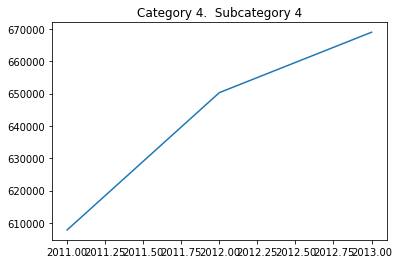

Model Score: 0.9519440981304795    2014 Sales Prediction: [[703495.67166667]]


In [48]:
##Category 4
subcat=[1,4]

for each in subcat:
    data1= data.loc[(data["prod_cat_code"]==4) & (data['prod_subcat_code']==each)]
    data1=data1.groupby(['transaction_year']).sum()
    data1=data1.reset_index()
    data1=data1.drop(3)
    
    X=data1['transaction_year'].values.reshape(-1,1)
    y=data1['total_amt'].values.reshape(-1,1)
    
    plt.plot(X,y)
    plt.title(f"Category 4.  Subcategory {each}")
    plt.show()
    
    model=LinearRegression()
    model.fit(X,y)
    Score=model.score(X,y)
    prediction= model.predict([[2014]])
    
    print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")


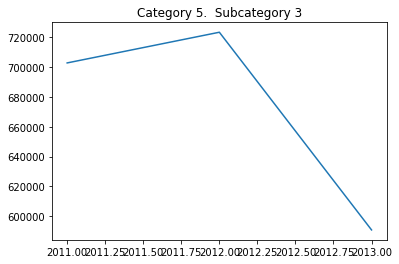

Model Score: 0.6160312181824816    2014 Sales Prediction: [[560296.14333333]]


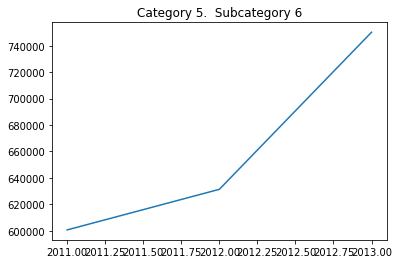

Model Score: 0.8962537826358852    2014 Sales Prediction: [[810264.08666664]]


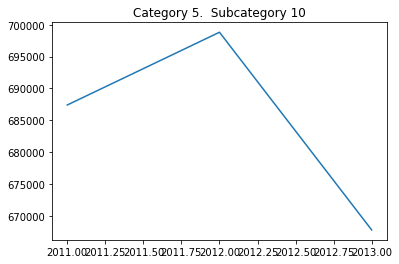

Model Score: 0.3903888159357606    2014 Sales Prediction: [[665054.56333333]]


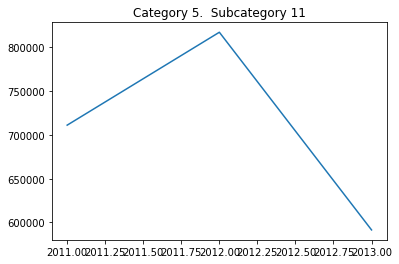

Model Score: 0.28050671819417616    2014 Sales Prediction: [[586955.74166666]]


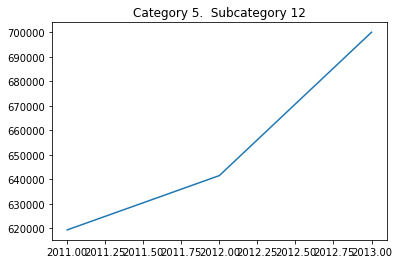

Model Score: 0.9366922927619789    2014 Sales Prediction: [[734330.69666666]]


In [49]:
##Category 5
subcat=[3,6,10,11,12]

for each in subcat:
    try:
        data1= data.loc[(data["prod_cat_code"]==5) & (data['prod_subcat_code']==each)]
        data1=data1.groupby(['transaction_year']).sum()
        data1=data1.reset_index()
        data1=data1.drop(3)

        X=data1['transaction_year'].values.reshape(-1,1)
        y=data1['total_amt'].values.reshape(-1,1)

        plt.plot(X,y)
        plt.title(f"Category 5.  Subcategory {each}")
        plt.show()

        model=LinearRegression()
        model.fit(X,y)
        Score=model.score(X,y)
        prediction= model.predict([[2014]])

        print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")
        
    except:
        print("exception")


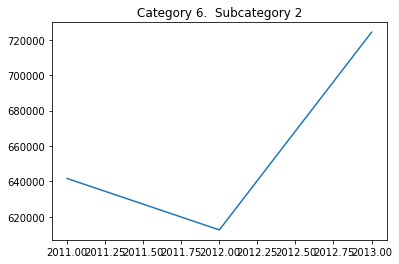

Model Score: 0.5083576623331307    2014 Sales Prediction: [[742103.26666667]]


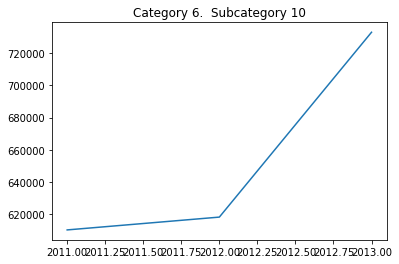

Model Score: 0.7984150316426323    2014 Sales Prediction: [[776677.24333332]]


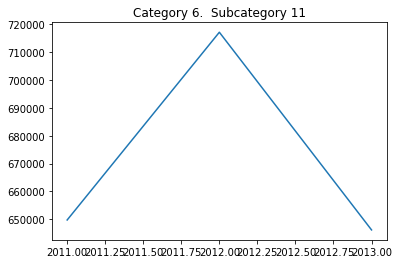

Model Score: 0.001988098527383908    2014 Sales Prediction: [[667457.93833333]]


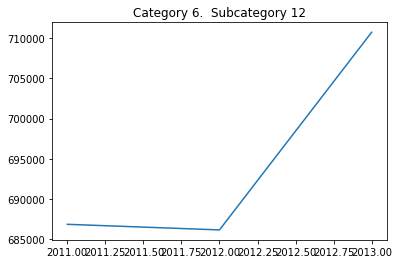

Model Score: 0.7281035958892068    2014 Sales Prediction: [[718416.855]]


In [50]:
##Category 6
subcat=[2,10,11,12]

for each in subcat:
    try:
        data1= data.loc[(data["prod_cat_code"]==6) & (data['prod_subcat_code']==each)]
        data1=data1.groupby(['transaction_year']).sum()
        data1=data1.reset_index()
        data1=data1.drop(3)

        X=data1['transaction_year'].values.reshape(-1,1)
        y=data1['total_amt'].values.reshape(-1,1)

        plt.plot(X,y)
        plt.title(f"Category 6.  Subcategory {each}")
        plt.show()

        model=LinearRegression()
        model.fit(X,y)
        Score=model.score(X,y)
        prediction= model.predict([[2014]])

        print(f"Model Score: {Score}    2014 Sales Prediction: {prediction}")
        
    except:
        print("exception")